多様体上の最適化でGMMを解く

まずは混合ではない普通の1次元ガウス分布

In [29]:
import numpy as np
import pylab as plt
import seaborn as sns
%matplotlib inline

In [20]:
def make_data(list_μ, list_σ, list_π, nb_data):
    data = []
    for μₖ, σₖ, πₖ in zip(list_μ, list_σ, list_π):
        for i in range(nb_data * πₖ):
            data.append(np.random.multivariate_normal(μₖ, σₖ))
    return np.array(data)

In [49]:
K = 1
D = 1
true_μ_K = [[0]]
true_σ_K = [[[1]]]
true_π_K = [1]

nb_data = 10000

In [22]:
data = make_data(true_μ_K, true_σ_K, true_π_K, nb_data)

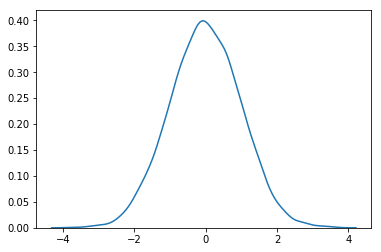

In [30]:
sns.kdeplot(data.reshape(-1))

In [43]:
y = np.c_[data, np.ones(len(data))]

In [44]:
import torch
from torch.autograd import Variable

In [45]:
y = Variable(torch.from_numpy(y)).float()

In [51]:
def p(x_N, S):
    S_N = S.expand(x_N.size())
    # 多変量になってないから直す
    return -0.5 * torch.log(2 * np.pi * S ** 2) - 0.5 * (x_N)**2 / S ** 2

def get_gmm_lpdf(normal_lpdf_K_N, π_K):
    gmm_lpdf_N = 0
    for normal_lpdfₖ_N, πₖ in zip(normal_lpdf_K_N, π_K):
        πₖ_N = πₖ.expand(normal_lpdfₖ_N.size())
        gmm_lpdf_N += (torch.exp(normal_lpdfₖ_N) * πₖ_N)
    gmm_lpdf = torch.log(gmm_lpdf_N)

    Σπ = torch.sum(π_K)
    gmm_lpdf -= torch.abs(1 - Σπ)
    return gmm_lpdf


In [ ]:
def q(y,S):
    # (2*np.pi)**0.5 * torch.exp(0.5) *
    

In [52]:
S_K = Variable(torch.randn(D+1, K), requires_grad=True)
η_K = Variable(torch.randn(K), requires_grad=True)

In [53]:
torch.sum(p(y, S_K))

RuntimeError: The expanded size of the tensor (10000) must match the existing size (2) at non-singleton dimension 0. at /opt/conda/conda-bld/pytorch_1503970438496/work/torch/lib/TH/generic/THTensor.c:308